<a href="https://colab.research.google.com/github/MojtabaSr/Solution-to-an-Introduction-to-statistical-learning-in-python/blob/main/Logistic%20Regression_Chapter%204.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**10.** This question should be answered using the Weekly data set, which
is part of the ISLR package. This data is similar in nature to the
Smarket data from this chapter’s lab, except that it contains 1089
weekly returns for 21 years, from the beginning of 1990 to the end of
2010.

A) Produce some numerical and graphical summaries of the Weekly
data. Do there appear to be any patterns?

In [1]:
import pandas as pd
url_auto="https://raw.githubusercontent.com/dsnair/ISLR/master/data/csv/Weekly.csv"
df=pd.read_csv(url_auto) #Load it first

df.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


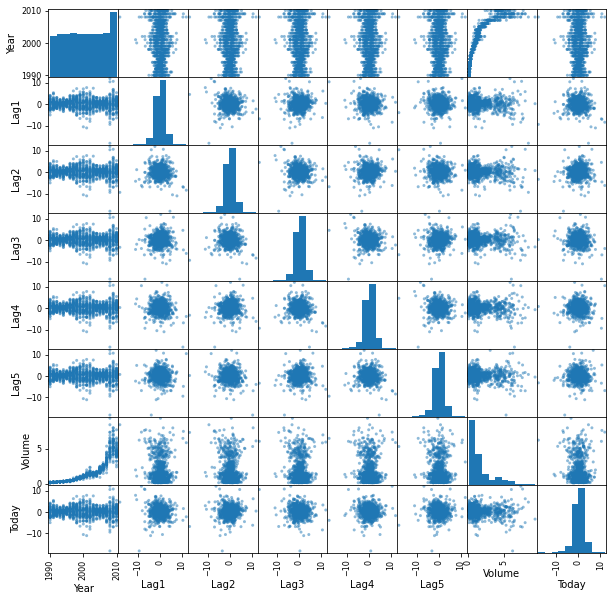

In [2]:
pd.plotting.scatter_matrix(df,figsize=(10,10));

**Answer:** There is a pattern between year and volume from the graphical data

B) Use the full data set to perform a logistic regression with Direction
as the response and the five lag variables plus Volume as predictors.
Use the summary function to print the results. Do any of
the predictors appear to be statistically significant? If so, which
ones?

In [3]:
from sklearn import preprocessing as pp
y=df[['Direction']].values
le=pp.LabelEncoder()
df['Direction']=le.fit_transform(y) #labelencode the dependent variable using sklearn

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [4]:
import statsmodels.api as sm
from statsmodels.formula.api import logit

model=logit(formula='Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume', data=df)


model_fit= model.fit() #fit the logistic regression model

print(model_fit.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Sat, 25 Dec 2021   Pseudo R-squ.:                0.006580
Time:                        18:09:14   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.

**Answer:** Lag 2 seems to be statistically significant due to its low p-value

In [5]:
def plot_cm(cm):

  import seaborn as sns
  import matplotlib.pyplot as plt
   

  ax= plt.subplot()
  sns.heatmap(cm, annot=True, fmt='g', ax=ax);
  ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
  ax.set_title('Confusion Matrix'); 

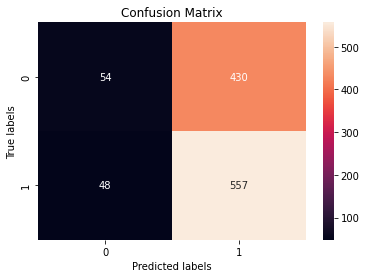

In [6]:
cm=model_fit.pred_table() #creats the CM on prediction data
plot_cm(cm)

In [7]:
import numpy as np
print(f"Score: {(cm[0][0]+cm[1][1])/(np.sum(cm))}")

Score: 0.5610651974288338


**Answer:** The accuracy of the confusion matrix is roughly 56%. It also tels us that the model predicted 557 as up and 54 as down

D) Now fit the logistic regression model using a training data period
from 1990 to 2008, with Lag2 as the only predictor. Compute the
confusion matrix and the overall fraction of correct predictions
for the held out data (that is, the data from 2009 and 2010). 


In [8]:
df.set_index('Year',inplace=True)
X_train=df.loc[:'2009','Lag2'].values
y_train=df.loc[:'2009','Direction'].values

model=sm.Logit(y_train,X_train);
model_fit=model.fit()
print(model_fit.summary())

Optimization terminated successfully.
         Current function value: 0.690936
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1037
Model:                          Logit   Df Residuals:                     1036
Method:                           MLE   Df Model:                            0
Date:                Sat, 25 Dec 2021   Pseudo R-squ.:               -0.004833
Time:                        18:09:15   Log-Likelihood:                -716.50
converged:                       True   LL-Null:                       -713.05
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0569      0.027      2.122      0.034       0.004       0.110


Test accuracy =  0.5480769230769231


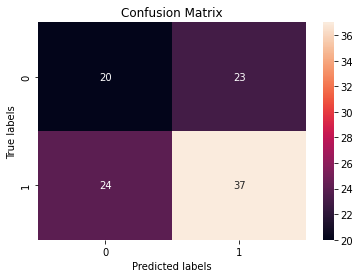

In [9]:
from sklearn.metrics import (confusion_matrix,accuracy_score)
   


X_test=df.loc['2009':,'Lag2'].values
y_test=df.loc['2009':,'Direction'].values

pred=model_fit.predict(X_test)
pred=np.where(pred>0.5,1,0)

# confusion matrix
cm = confusion_matrix(y_test, pred)
plot_cm(cm)
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_test, pred))



**Answer:** 55% model accuracy

E) Repeat D) using LDA.

**Note:** LDA stands for linear discriminant analysis. We will solve this using sklean. LDA models assume that the underlying data is normally distributed

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test accuracy =  0.6153846153846154


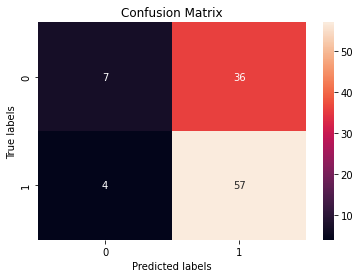

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda

model_fit_transform= lda().fit(X_train.reshape(-1,1),y_train.reshape(-1,1))

pred=model_fit_transform.predict(X_test.reshape(-1,1))


# confusion matrix
cm = confusion_matrix(y_test, pred)
plot_cm(cm)

# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_test, pred))

**Answer:** 61.5% accuracy using linear discriminant analysis

F) Repeat D) using QDA.

**Note:** QDA stands for quadratic discriminant analysis

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test accuracy =  0.5865384615384616


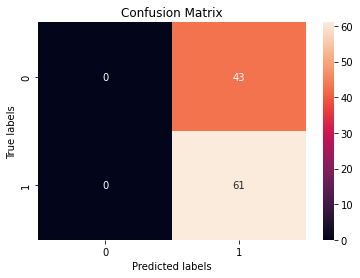

In [11]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as qda

model= qda().fit(X_train.reshape(-1,1),y_train.reshape(-1,1))
pred= model.predict(X_test.reshape(-1,1))

# confusion matrix
cm = confusion_matrix(y_test, pred)
plot_cm(cm)

# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_test, pred))

In [12]:
print(pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


**Answer:** QDA failed to classify any "Down" factor by predicting that all values are "Up" factors in our case

G) Repeat D) using KNN with K = 1

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Test accuracy =  0.6057692307692307


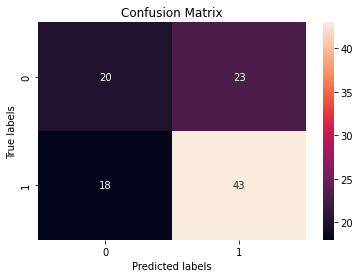

In [13]:
from sklearn.neighbors import KNeighborsClassifier as knn

model= knn().fit(X_train.reshape(-1,1),y_train.reshape(-1,1))
pred=model.predict(X_test.reshape(-1,1))

cm=confusion_matrix(y_test,pred)
plot_cm(cm)

# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_test, pred))

**Answer:** 60.5% accuracy using KNN

H) Which of these methods appears to provide the best results on
this data?

**Answer:** LDA and logistic regression provide better result, but since stock market is uncertain we cant use LDA because it assumes that the data is normally distributed, which stock market prices arent! By interpreting the cm for these models you can see that logistic regression has classified more correct labels than LDA, which has classified much of its result as "Up" factors in our case 

**11.** In this problem, you will develop a model to predict whether a given
car gets high or low gas mileage based on the Auto data set.

A) Create a binary variable, mpg01, that contains a 1 if mpg contains
a value above its median, and a 0 if mpg contains a value below
its median.

In [38]:
import pandas as pd
url_auto="https://raw.githubusercontent.com/selva86/datasets/master/Auto.csv"
df=pd.read_csv(url_auto) #Load it first

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [39]:
df.drop('name',axis=1,inplace=True);

B) Explore the data graphically in order to investigate the association
between mpg01 and the other features. Which of the other
features seem most likely to be useful in predicting mpg01? Scatterplots
and boxplots may be useful tools to answer this question.
Describe your findings.

In [40]:
median_mpg=np.median(df['mpg'])
mpg01= np.where(df['mpg']<median_mpg,0,1)
df['mpg01'] = mpg01.tolist()
df.drop('mpg',axis=1,inplace=True);

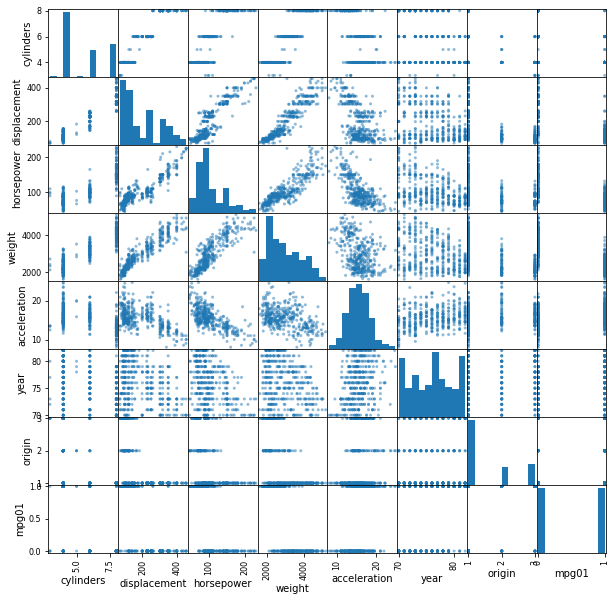

In [41]:
pd.plotting.scatter_matrix(df,figsize=(10,10));

In [42]:
df.corr()

,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
cylinders,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932,-0.759194
displacement,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535,-0.753477
horsepower,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171,-0.667053
weight,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005,-0.757757
acceleration,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746,0.346822
year,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528,0.429904
origin,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000,0.513698
mpg01,-0.759194,-0.753477,-0.667053,-0.757757,0.346822,0.429904,0.513698,1.000000


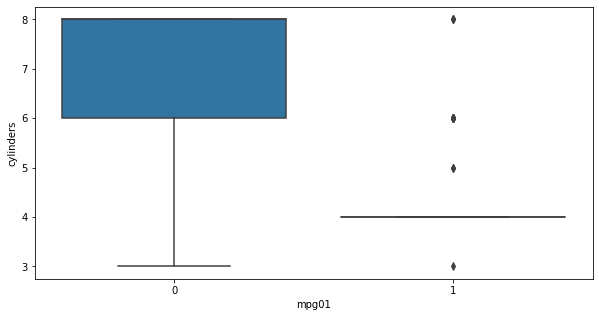

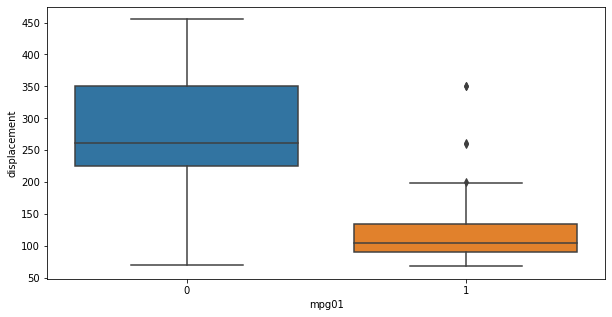

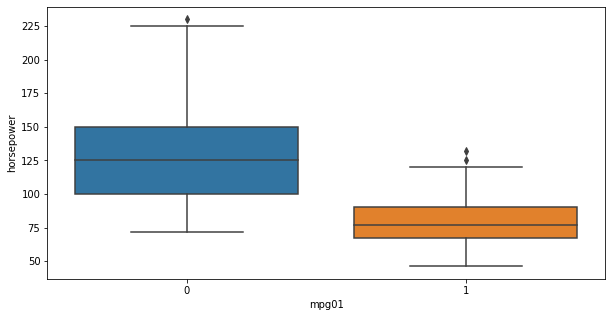

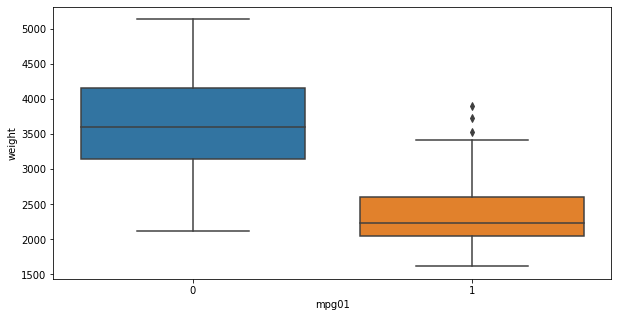

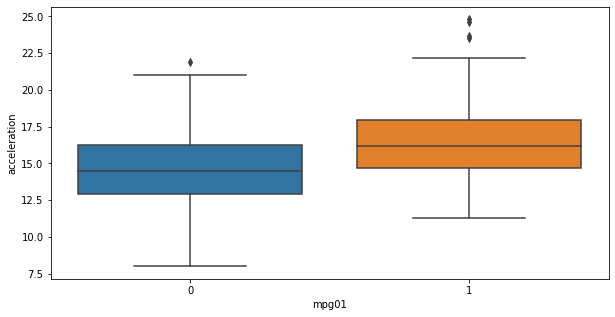

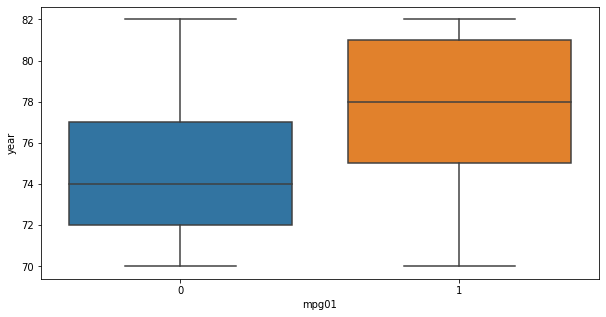

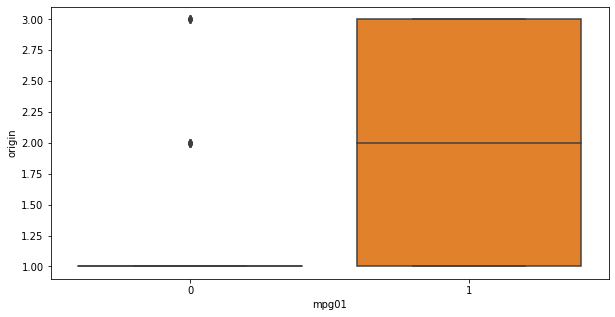

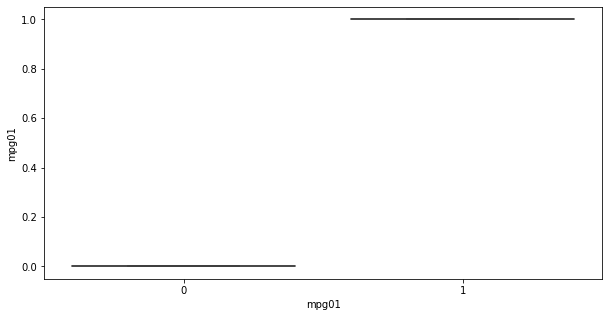

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in df:
  fig = plt.figure(figsize=(10,5))
  sns.boxplot(x='mpg01', y=col, data=df)

**Answer:** Judging last row of correlation matrix we can see that there is a correlation between cylinders, displacement, horsepower and	weight

C) Split the data into a training set and a test set

In [53]:
from sklearn.model_selection import train_test_split 

X=df.drop(['acceleration',	'year',	'origin',	'mpg01'],axis=1)
y=df[['mpg01']]

X_train, X_test, y_train, y_test = train_test_split(X,y)

D) Perform LDA on the training data in order to predict mpg01
using the variables that seemed most associated with mpg01 in
B). What is the test error of the model obtained?

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Test accuracy =  0.9081632653061225


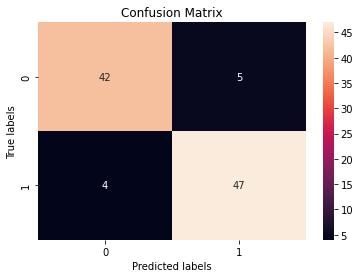

In [55]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda

model_fit= lda().fit(X_train,y_train)

pred=model_fit.predict(X_test)


# confusion matrix
cm = confusion_matrix(y_test, pred)
plot_cm(cm)

# accuracy score of the model
print('\nTest accuracy = ', accuracy_score(y_test, pred))

**Answer:** We have an accuracy of 91%

E) Perform QDA on the training data in order to predict mpg01
using the variables that seemed most associated with mpg01 in
(b). What is the test error of the model obtained?

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Test accuracy =  0.8877551020408163


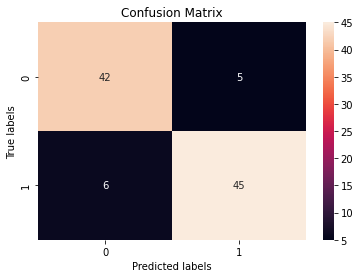

In [56]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as qda

model= qda().fit(X_train,y_train)
pred= model.predict(X_test)

# confusion matrix
cm = confusion_matrix(y_test, pred)
plot_cm(cm)

# accuracy score of the model
print('\nTest accuracy = ', accuracy_score(y_test, pred))

**Answer:** We have an accuracy of 88% with QDA

F) Perform logistic regression on the training data in order to predict
mpg01 using the variables that seemed most associated with
mpg01 in (b). What is the test error of the model obtained?

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Test accuracy =  0.8979591836734694


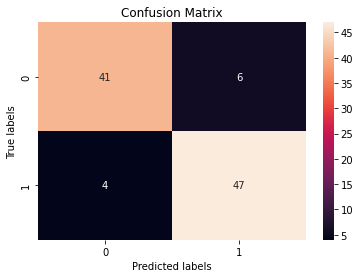

In [58]:
from sklearn.linear_model import LogisticRegression as lr

model_fit= lr().fit(X_train,y_train)
pred= model_fit.predict(X_test)

# confusion matrix
cm = confusion_matrix(y_test, pred)
plot_cm(cm)

# accuracy score of the model
print('\nTest accuracy = ', accuracy_score(y_test, pred))

**Answer:** 89% accuracy result using logistic regression

G) Perform KNN on the training data, with several values of K, in
order to predict mpg01. Use only the variables that seemed most
associated with mpg01 in (b). What test errors do you obtain?
Which value of K seems to perform the best on this data set?

In [72]:
from sklearn.neighbors import KNeighborsClassifier as knn

for i in range(1,6):
  model= knn(n_neighbors=i).fit(X_train,y_train.values.ravel())
  pred=model.predict(X_test)

  # accuracy score of the model
  print(f"Model {i}:")
  print(f"Accuracy: {round(accuracy_score(y_test, pred),3)*100}%\n")

Model 1:
Accuracy: 84.7%

Model 2:
Accuracy: 80.60000000000001%

Model 3:
Accuracy: 87.8%

Model 4:
Accuracy: 84.7%

Model 5:
Accuracy: 86.7%



Question 12 is skipped because the function that needs to be created already exists in Numpy, check np.power(), and question 13 is the same as question 11 with different dataset, so it is also skipped!